# Upload Images
Upload your images to the images/ folder under the current working directory, which can be found in the left sidebar after running the code below. Images can be uploaded using a simple drag-and-drop from your local files into Colab, or within your local directory if using Jupyter notebooks.

In [ ]:
!mkdir images
!mkdir masks
!mkdir masks/red
!mkdir masks/green
!mkdir masks/blue

All image masks containing the segmented cells will be saved to the masks/ folder. The names of the masks will match the names of their corresponding input images and saved to their respective RGB frame folders (red/, green/, and blue/).

# Method 1: U-Net
Segment your images using a pre-trained Tensorflow model. You can use our model or upload your own.

In [4]:
# import model
!wget https://github.com/bicbioeng/BASIN/raw/master/BASIN-ML/www/cell_segmentation_unet_model.h5

# alternatively download your own model
# !wget ...

--2021-05-20 23:20:18--  https://github.com/bicbioeng/BASIN/raw/master/BASIN-ML/www/cell_segmentation_unet_model.h5
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bicbioeng/BASIN/master/BASIN-ML/www/cell_segmentation_unet_model.h5 [following]
--2021-05-20 23:20:19--  https://raw.githubusercontent.com/bicbioeng/BASIN/master/BASIN-ML/www/cell_segmentation_unet_model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23522440 (22M) [application/octet-stream]
Saving to: ‘cell_segmentation_unet_model.h5’

cell_segmentation_u 100%[===================>]  22.43M  43.6MB/s    in 0.5s    

2021-05-20

In [64]:
import tensorflow as tf
import os
import cv2
import numpy as np

model = tf.keras.models.load_model("/content/cell_segmentation_unet_model.h5")
# model = tf.keras.models.load_model("name of your model")
 
# import images
dir = os.listdir("images")
imgs = [cv2.imread(os.path.join("images",img)) for img in dir]

In [60]:
h = model.input.shape[1]
w = model.input.shape[2]
n = len(imgs)

# resize images based on model input dimensions
imgs_resized = [cv2.resize(img, [h,w]) for img in imgs]

reds = [img[:,:,0] for img in imgs_resized]
greens = [img[:,:,1] for img in imgs_resized]
blues = [img[:,:,2] for img in imgs_resized]

red_in = tf.reshape(reds, shape = [n,h,w,1])
green_in = tf.reshape(greens, shape = [n,h,w,1])
blue_in = tf.reshape(blues, shape = [n,h,w,1])

# generate masks using model
red_mask = model.predict(red_in)
red_mask = (red_mask >= 0.5).astype(np.uint8)
green_mask = model.predict(green_in)
green_mask = (green_mask >= 0.5).astype(np.uint8)
blue_mask = model.predict(blue_in)
blue_mask = (blue_mask >= 0.5).astype(np.uint8)

In [68]:
for i in range(0, n):
  name = dir[i]
  h = imgs[i].shape[0]
  w = imgs[i].shape[1]
  # subset and resize frames to match original dimensions
  red = cv2.resize(red_mask[i,:,:,0], [h,w])
  green = cv2.resize(green_mask[i,:,:,0], [h,w])
  blue = cv2.resize(blue_mask[i,:,:,0],[h,w])
  # save masks
  red_file = os.path.join("masks","red",name)
  green_file = os.path.join("masks","green",name)
  blue_file = os.path.join("masks","blue",name)
  cv2.imwrite(red_file, red)
  cv2.imwrite(green_file, green)
  cv2.imwrite(blue_file, blue)

# zip the masks folder and upload it to your BASIN ML session
!zip -r masks.zip masks/

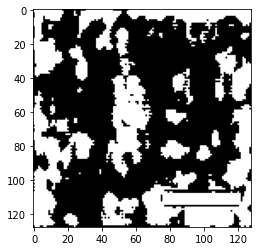

In [70]:
# visualize your masks
import matplotlib.pyplot as plt
test_img = red_mask[0, :, :, 0]

plt.imshow(test_img, cmap='gray')

# Method 2: Cellpose
From the paper  *Cellpose: a generalist algorithm for cellular segmentation* (https://www.nature.com/articles/s41592-020-01018-x). More info can be found in the repository https://github.com/mouseland/cellpose. 

In [5]:
# install dependencies
!pip install cellpose

     |████████████████████████████████| 13.3MB 319kB/s 
     |████████████████████████████████| 38.2MB 1.2MB/s 
  Created wheel for cellpose: filename=cellpose-0.6.5-cp37-none-any.whl size=152503 sha256=998d4a40caf50e3acceed1d70b36d7c763a27ddc7cb4c30e41b6f0ed3512b78a
  Stored in directory: /root/.cache/pip/wheels/1c/df/8c/cc9a5bf8946adc663f419471d2ffe5879e37bc3bc6223adebf
Successfully built cellpose


In [2]:
# Download pre-trained Cellpose model
!wget https://github.com/bicbioeng/BASIN/raw/master/BASIN-ML/www/cellpose_residual_on_style_on_concatenation_off_Manually_curated_Images_and_Masks_2021_01_08_21_36_17.184931

--2021-05-20 23:03:35--  https://github.com/bicbioeng/BASIN/raw/master/BASIN-ML/www/cellpose_residual_on_style_on_concatenation_off_Manually_curated_Images_and_Masks_2021_01_08_21_36_17.184931
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bicbioeng/BASIN/master/BASIN-ML/www/cellpose_residual_on_style_on_concatenation_off_Manually_curated_Images_and_Masks_2021_01_08_21_36_17.184931 [following]
--2021-05-20 23:03:36--  https://raw.githubusercontent.com/bicbioeng/BASIN/master/BASIN-ML/www/cellpose_residual_on_style_on_concatenation_off_Manually_curated_Images_and_Masks_2021_01_08_21_36_17.184931
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP re

In [72]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
from inspect import getsourcefile
#%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

from urllib.parse import urlparse
from cellpose import models, plot

# import images
dir = os.listdir("images")
imgs = [cv2.imread(os.path.join("images",img)) for img in dir]
nimg = len(imgs)

imgs_2D = imgs
# convert grayscale to rgb
for i in range(0,len(imgs)):
  if imgs[i].ndim < 3:
    imgs[i] = plot.image_to_rgb(imgs[i])

In [73]:
model = models.CellposeModel(gpu = False, pretrained_model = "/content/cellpose_residual_on_style_on_concatenation_off_Manually_curated_Images_and_Masks_2021_01_08_21_36_17.184931")

channels_r = [1,0]
channels_g = [2,0]
channels_b = [3,0]

# get masks for red, green, and blue channels
masks_r, flows, styles = model.eval(imgs_2D, diameter=None, flow_threshold=None, channels = channels_r)
masks_g, flows, styles = model.eval(imgs_2D, diameter=None, flow_threshold=None, channels = channels_g)
masks_b, flows, styles = model.eval(imgs_2D, diameter=None, flow_threshold=None, channels = channels_b)

# computes the mask for a single image, channels 1-3 are RGB and 0 is grayscale
def compute_mask(img, channel):
  c = None
  if channel == 0:
    c = [0,0]
  elif channel == 1:
    c = [1,0]
  elif channel == 2:
    c = [2,0]
  else:
    c = [3,0]
  masks, flows, styles = model.eval(img,diameter=None, flow_threshold=None, channels = c)
  return masks

#### DEFAULT MODEL
# model = models.Cellpose(gpu = False, model_type='cyto') 
# channels_r = [1,0]
# channels_g = [2,0]
# channels_b = [3,0]

# # get masks for red, green, and blue channels
# masks_r, flows, styles, diams = model.eval(imgs_2D, diameter=None, flow_threshold=None, channels = channels_r)
# masks_g, flows, styles, diams = model.eval(imgs_2D, diameter=None, flow_threshold=None, channels = channels_g)
# masks_b, flows, styles, diams = model.eval(imgs_2D, diameter=None, flow_threshold=None, channels = channels_b)

# # computes the mask for a single image, channels 1-3 are RGB and 0 is grayscale
# def compute_mask(img, channel):
#   c = None
#   if channel == 0:
#     c = [0,0]
#   elif channel == 1:
#     c = [1,0]
#   elif channel == 2:
#     c = [2,0]
#   else:
#     c = [3,0]
#   masks, flows, styles, diams = model.eval(img,diameter=None, flow_threshold=None, channels = c)
#   return masks

2021-05-21 02:28:42,821 [INFO] parsing model string cellpose_residual_on_style_on_concatenation_off_Manually_curated_Images_and_Masks_2021_01_08_21_36_17.184931 to get cellpose options
2021-05-21 02:28:42,822 [INFO] >>>> using CPU
2021-05-21 02:28:43,052 [INFO] 0%|          | 0/6 [00:00<?, ?it/s]
2021-05-21 02:28:47,741 [WARNING] WARNING: no mask pixels found
2021-05-21 02:28:56,896 [INFO] 50%|#####     | 3/6 [00:13<00:13,  4.56s/it]
2021-05-21 02:29:00,380 [WARNING] WARNING: no mask pixels found
2021-05-21 02:29:09,075 [INFO] 0%|          | 0/6 [00:00<?, ?it/s]
2021-05-21 02:29:12,595 [WARNING] WARNING: no mask pixels found
2021-05-21 02:29:21,323 [INFO] 50%|#####     | 3/6 [00:12<00:11,  3.89s/it]
2021-05-21 02:29:24,828 [WARNING] WARNING: no mask pixels found
2021-05-21 02:29:58,138 [INFO] 100%|##########| 6/6 [00:24<00:00,  4.11s/it]


In [82]:
for i in range(0, n):
  name = dir[i]
  # subset frames to match original dimensions
  red = masks_r[i]
  green = masks_g[i]
  blue = masks_b[i]
  # save masks
  red_file = os.path.join("masks","red",name)
  green_file = os.path.join("masks","green",name)
  blue_file = os.path.join("masks","blue",name)
  cv2.imwrite(red_file, red)
  cv2.imwrite(green_file, green)
  cv2.imwrite(blue_file, blue)

# zip the masks folder and upload it to your BASIN ML session
!zip -r masks.zip masks/

  adding: masks/ (stored 0%)
  adding: masks/red/ (stored 0%)
  adding: masks/red/chiou_f6_bcl2_ir-cd133-.tif (deflated 93%)
  adding: masks/red/chiou_f1_cd133-.tif (deflated 76%)
  adding: masks/red/.ipynb_checkpoints/ (stored 0%)
  adding: masks/red/chiou_f6_mge_ir-cd133-.tif (deflated 30%)
  adding: masks/red/chiou_f6_bcl2_ir-cd133+.tif (deflated 93%)
  adding: masks/red/chiou_f1_cd133+.tif (deflated 73%)
  adding: masks/red/chiou_f6_mge_ir-cd133+.tif (deflated 56%)
  adding: masks/green/ (stored 0%)
  adding: masks/green/chiou_f6_bcl2_ir-cd133-.tif (deflated 93%)
  adding: masks/green/chiou_f1_cd133-.tif (deflated 84%)
  adding: masks/green/chiou_f6_mge_ir-cd133-.tif (deflated 63%)
  adding: masks/green/chiou_f6_bcl2_ir-cd133+.tif (deflated 93%)
  adding: masks/green/chiou_f1_cd133+.tif (deflated 72%)
  adding: masks/green/chiou_f6_mge_ir-cd133+.tif (deflated 90%)
  adding: masks/blue/ (stored 0%)
  adding: masks/blue/chiou_f6_bcl2_ir-cd133-.tif (deflated 76%)
  adding: masks/blue/